# **PRIMERA ENTREGA PROYECTO CLASIFICACIÓN SUELOS**

Diana Pineda Valencia    
Cod. 20222579020

*Teoria y logica de programación*  
*30-04-2023* 

In [ ]:
import pandas as pd
import matplotlib.path as mpath
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d

In [55]:
#valores de entrada
Malla= pd.Series([
    "#4", #Tamiz #4
    "#10", #Tamiz #10
    "#20", #Tamiz #20
    "#40", #Tamiz #40
    "#60", #Tamiz #60
    "#140", #Tamiz #140
    "#200", #Tamiz #200
    "fondo", #Fondo
])

Abertura= pd.Series([
    "4.750", #Abertura Tamiz #4
    "2.000", #Abertura Tamiz #10
    "0.850", #Abertura Tamiz #20
    "0.425", #Abertura Tamiz #40
    "0.250", #Abertura Tamiz #60
    "0.106", #Abertura Tamiz #140
    "0.075", #Abertura Tamiz #200
    "0", #fondo
])



Retenido= pd.Series([
    95, #Tamiz #4
    80, #Tamiz #10
    51, #Tamiz #20
    33, #Tamiz #40
    13, #Tamiz #60
    6, #Tamiz #140
    3, #Tamiz #200
    67, #Fondo
  
])

Acum=[] #Matriz donde se guardan los datos 
#Realizar calculo de datos, valor retenidido mas valor acumulado 
Acum.append(Retenido[0]+0)
Acum.append(Retenido[1]+Acum[0])
Acum.append(Retenido[2]+Acum[1])
Acum.append(Retenido[3]+Acum[2])
Acum.append(Retenido[4]+Acum[3])
Acum.append(Retenido[5]+Acum[4])
Acum.append(Retenido[6]+Acum[5])
Acum.append(Retenido[7]+Acum[6])
Ret_Acu =pd.Series(Acum)


AcuP=[] 
#Realizar Calculo, valor Acumulado total - valor retenido el el primer tamiz
AcuP.append(Acum[7]-Retenido[0])

#Valor acumulado menos el valor retenido en cada tamiz
AcuP.append(AcuP[0]-Retenido[1])
AcuP.append(AcuP[1]-Retenido[2])
AcuP.append(AcuP[2]-Retenido[3])
AcuP.append(AcuP[3]-Retenido[4])
AcuP.append(AcuP[4]-Retenido[5])
AcuP.append(AcuP[5]-Retenido[6])
AcuP.append(AcuP[6]-Retenido[7])
Pasa = pd.Series(AcuP)

Granulometria = pd.DataFrame({  #Se crea la tabla con los valores que se deben ingresar en cada columna 
    'Malla': Malla,
    'Abertura': Abertura,
    'Retenido': Retenido,
    'Retenido Acumulado': Ret_Acu,
    'Pasa': Pasa
})


Peso_Total = Granulometria["Retenido"].sum() #Obtenemos el peso total de la muestra de suelo 
Peso_Total

Porpasa=[] #Obtenemos el porcentaje que pasa en cada tamiz, con el peso que pasa y el peso total
Porpasa.append((Pasa[0]*100)/Peso_Total)
Porpasa.append((Pasa[1]*100)/Peso_Total)
Porpasa.append((Pasa[2]*100)/Peso_Total)
Porpasa.append((Pasa[3]*100)/Peso_Total)
Porpasa.append((Pasa[4]*100)/Peso_Total)
Porpasa.append((Pasa[5]*100)/Peso_Total)
Porpasa.append((Pasa[6]*100)/Peso_Total)
Porpasa.append((Pasa[7]*100)/Peso_Total)
Porcen_Pasa = pd.Series(Porpasa)

Granulometria = pd.DataFrame({ #Tabla con la nueva columna de %Pasa
    'Malla': Malla,
    'Abertura': Abertura,
    'Retenido': Retenido,
    'Retenido Acumulado': Ret_Acu,
    'Pasa': Pasa,
    '% Pasa': Porcen_Pasa
})

print(Granulometria)

   Malla Abertura  Retenido  Retenido Acumulado  Pasa     % Pasa
0     #4    4.750        95                  95   253  72.701149
1    #10    2.000        80                 175   173  49.712644
2    #20    0.850        51                 226   122  35.057471
3    #40    0.425        33                 259    89  25.574713
4    #60    0.250        13                 272    76  21.839080
5   #140    0.106         6                 278    70  20.114943
6   #200    0.075         3                 281    67  19.252874
7  fondo        0        67                 348     0   0.000000


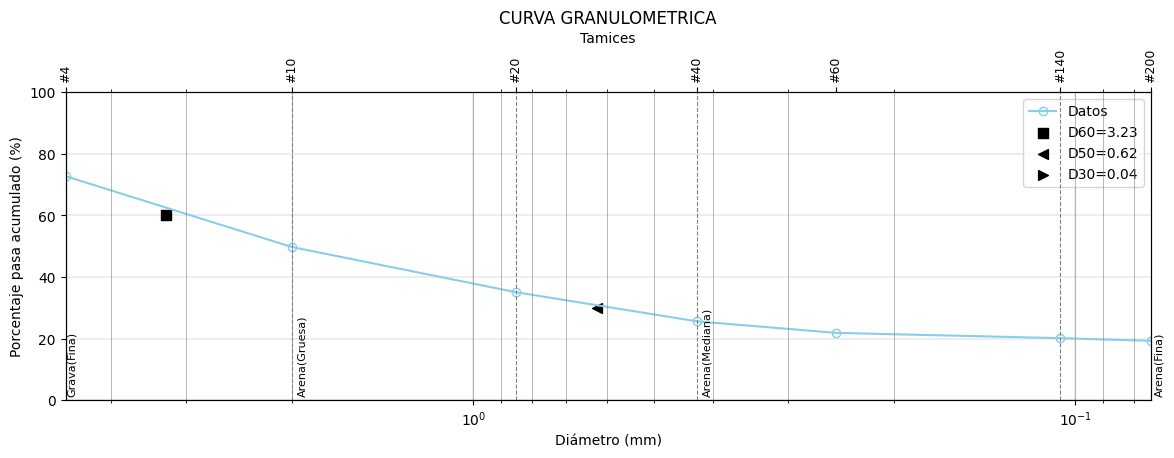

In [52]:
TMP= np.array([
    4.750, #Abertura Tamiz #4
    2.000, #Abertura Tamiz #10
    0.850, #Abertura Tamiz #20
    0.425, #Abertura Tamiz #40
    0.250, #Abertura Tamiz #60
    0.106, #Abertura Tamiz #140
    0.075, #Abertura Tamiz #200
    0, #Fondo
])


#Se grafica la línea de la granulometría
plt.figure(figsize=(14, 4)) 
plt.plot(TMP, Porcen_Pasa, linestyle='-', marker='o', color='skyblue', fillstyle='none',label='Datos') 
f = interp1d(Porcen_Pasa, TMP)

#Calcular D60 D50 D30 D10
#valores de entrada
y1_coord = 60
y2_coord = 30
y3_coord = 10

#Realiza interpolación
x1_coord = f(y1_coord)
x2_coord = f(y2_coord)
x3_coord = f(y3_coord)

x1_coord = x1_coord.astype(np.float_)

#Solo toma dos decimales
x1_formatted = '{:.2f}'.format(x1_coord)
x2_formatted = '{:.2f}'.format(x2_coord)
x3_formatted = '{:.2f}'.format(x3_coord)

#Los ubica en el plano
plt.scatter(x1_coord, y1_coord, marker='s', s=50, color='k', label='D60='+x1_formatted)
plt.scatter(x2_coord, y2_coord, marker='<', s=50, color='k', label='D50='+x2_formatted)
plt.scatter(x3_coord, y3_coord, marker='>', s=50, color='k', label='D30='+x3_formatted)

#Grafica
plt.title("",fontsize=12)
plt.xlabel('Diámetro (mm)')
plt.ylabel('Porcentaje pasa acumulado (%)')
plt.title('CURVA GRANULOMETRICA')
plt.legend() 
plt.xscale("log")
plt.xlim(0.075,4.75)
plt.ylim(0,100) 
plt.grid(color='k',lw='0.1',ls='-')

#se agregan más grillas
ax1 = plt.gca()
ax1.invert_xaxis()

# Agregar el segundo eje x para los nombres de los tamices
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xticks(TMP)
ax2.set_xticklabels(Malla, rotation=90, fontsize=9)

# Agregar linas de los tamices
ax2.set_xlabel('Tamices')
ax2.set_xlim(0.075,4.75)
ax2.invert_xaxis()

#agregamos nombre lineas verticales
L_No10 = ([4.75,4.75]) 
L_No20 = ([2,2]) 
L_No40 = ([0.850,0.850]) 
L_No60 = ([0.425,0.425])
L_No140 = ([0.106,0.106])  
L_rango = ([0,100])

#se indicca en el plot la ubicación de estas líneas
plt.plot(L_No10, L_rango, color='grey', lw='0.8', ls='--')
plt.plot(L_No20, L_rango, color='grey', lw='0.8', ls='--') 
plt.plot(L_No40, L_rango, color='grey', lw='0.8', ls='--')
plt.plot(L_No60, L_rango, color='grey', lw='0.8', ls='--')
plt.plot(L_No140, L_rango, color='grey', lw='0.8', ls='--')

#se agrega textos
plt.text(4.73, 2, 'Grava(Fina)', fontsize=8, rotation=90)
plt.text(1.96, 2, 'Arena(Gruesa)', fontsize=8, rotation=90)
plt.text(0.416, 2, 'Arena(Mediana)', fontsize=8, rotation=90)
plt.text(0.074, 2, 'Arena(Fina)', fontsize=8, rotation=90)

x_values = [4, 3, 2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08]
for x in x_values:
    plt.axvline(x=x, color='grey', ls='-', lw='0.4')

plt.show()

Ingrese el CU7
Ingrese el CC2
Ingrese el limite liquido23
Ingrese el indice de plasticidad43
Baja plasticidad
El punto no se encuentra en la carta de plasticidad


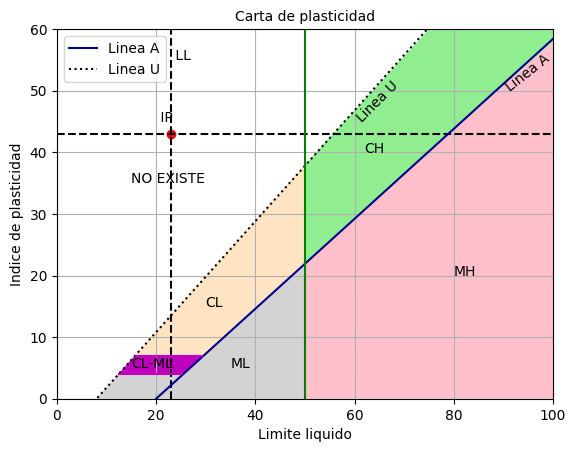

In [56]:
def cartaPlasticidad(Limite_liquido,Indice_plasticidad):

    # Con los datos del limite liquido y el Indice de plasticidad se grafica la ubicación del suelo en la carta de plasticidad.
    plt.plot(Limite_liquido,Indice_plasticidad,'ro')
    plt.vlines(Limite_liquido,0,60,'k','--')
    plt.annotate(' LL ',(Limite_liquido,55))
    plt.annotate(' IP ', (20,Indice_plasticidad + 2))
    plt.hlines(Indice_plasticidad,0,100,'k','--')

    # Se establecen los limites de los ejes x,y.
    plt.xlim(0,100)
    plt.ylim(0,60)

    # Para graficar las lineas de la carta de plasticidad utilizamos las ecuaciones conocidas para la Linea A y la Linea U:
    x=np.array([0,100])
    LineaA =0.73*(x-20)
    LineaU = 0.9*(x-8)
    plt.annotate('Linea A', (90,50),rotation=38) # Etiqueta de la linea A
    plt.annotate('Linea U', (60,45),rotation=45) # Etiqueta de la linea U

    # Estas lineas gráfican las lineas A y U de forma estética
    plt.plot(x, LineaA, 'darkblue', label = "Linea A" )
    plt.plot(x, LineaU, 'k:', label = "Linea U")

    # Graficamos lineas frontera de la carta de plasticidad donde se encuentran los suelos CL-ML
    plt.hlines(7,15.7,29.5,'m')
    plt.hlines(4,12.4,25.5,'m')

#AQUI OCURRE LA MAGIA 
    # Estas lineas permiten que se muestren en la gráfica las etiquetas de las diferentes zonas.

    region_MH = np.array([[50,0], [50,22], [100,58], [100,0]])
    region_ML = np.array([[25.5,4], [12.4,4], [8,0], [20,0], [50,0], [50,22]])
    region_CH = np.array([[50,22], [100,58], [100,60], [75,60], [50,38]])
    region_CL_ML = np.array([[29.5,7], [15.7,7], [12.4,4], [25.5,4]])
    region_CL = np.array([[15.7,7], [29.5,7], [50,22], [50,38]])

    path_MH = mpath.Path(region_MH)
    path_CH = mpath.Path(region_CH)
    path_CL = mpath.Path(region_CL)
    path_CL_ML = mpath.Path(region_CL_ML)
    path_ML = mpath.Path(region_ML)

    point = np.array([Limite_liquido,Indice_plasticidad])
    if path_MH.contains_point(point):
        print('El punto se encuentra en la zona MH')
    elif path_CH.contains_point(point):
        print('El punto se encuentra en la zona CH')
    elif path_CL.contains_point(point):
        print('El punto se encuentra en la zona CL')
    elif path_CL_ML.contains_point(point):
        print('El punto se encuentra en la zona CL-ML')
    elif path_ML.contains_point(point):
        print('El punto se encuentra en la zona ML')
    else:
        print('El punto no se encuentra en la carta de plasticidad')


    plt.annotate('CL-ML', (15,5))
    plt.annotate('MH', (80,20))
    plt.annotate('CL', (30,15))
    plt.annotate('CH', (62,40))
    plt.annotate('ML', (35,5))
    plt.annotate('NO EXISTE', (15,35))

    # Divide la gráfica cuando el limite liquido es igual a 50 para diferenciar si el suelo es de plasticidad alta o baja
    plt.vlines(50,0,60,'g')

    # Estas lineas mejoran la estetica de la gráfica, hacen que se sombreen las diferentes zonas de la carta de plasticidad
    # Dentro de las variables de la d a la m se guardan las coordenadas que delimitan cada zona.
    d=[50,50,100,100]
    e=[0,22,58,0]
    plt.fill(d,e,'pink')
    f=[25.5,12.4,8,20,50,50]
    g=[4,4,0,0,0,22]
    plt.fill(f,g,'lightgray')
    h=[50,100,100,75,50]
    i=[22,58,60,60,38]
    plt.fill(h,i,'lightgreen')
    j=[29.5,15.7,12.4,25.5]
    k=[7,7,4,4]
    plt.fill(j,k,'m')
    l=[15.7,29.5,50,50]
    m=[7,7,22,38]
    plt.fill(l,m,'bisque')

    # Se grafica la grilla, el titulo y las etiquetas de los ejes.

    plt.grid()
    plt.title("Carta de plasticidad",fontsize=10)
    plt.xlabel("Limite liquido",fontsize=10)
    plt.ylabel("Indice de plasticidad",fontsize=10)
    plt.legend()


Tamiz_200 = Porcen_Pasa[6]
Tamiz_4 = Porcen_Pasa[0]
CU = int(input("Ingrese el CU"))
CC = int(input("Ingrese el CC"))

def CartaPlasticidad():
  LL = int(input("Ingrese el limite liquido"))
  IP= int(input("Ingrese el indice de plasticidad"))
  LineaA =0.73*(LL-20)
  LineaU = 0.9*(LL-8)
  if LL > 50:  #Alta plasticidad 
    if 0 < IP < LineaA:
      print("MH")
    elif LineaA < IP < LineaU:
      print("CH")
    else:
      print("EL SUELO NO EXISTE")

  else: #Baja plasticidad
    print("Baja plasticidad")
  cartaPlasticidad(LL,IP)

if Tamiz_200 > 50 :
  CartaPlasticidad()
else: 
  if Tamiz_4 > 50:

    if Tamiz_200<5 :
      if CU > 6 and CC < 3:
        print("SW")
      else:
        print("SP")

    elif 5<Tamiz_200<12: #Analizar cu y cc
          if CU > 6 and CC<3:
            print("SW")
            print(CartaPlasticidad())
          else:
            print("SP")
            cartaPlasticidad()
        
    else: 
      CartaPlasticidad()


  else: 
    print ("Gravas")

